# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'd:\\vscode-projects\\CancelScope-Hotel-Booking-Analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'd:\\vscode-projects\\CancelScope-Hotel-Booking-Analysis'

# Import libraries

Section 1 content

In [4]:
import pandas as pd # For data manipulation
import seaborn as sns # For data visualization
import matplotlib.pyplot as plt # For plotting
from sklearn.model_selection import train_test_split # For splitting the dataset
from sklearn.ensemble import RandomForestClassifier # For Random Forest model
from sklearn.metrics import classification_report, confusion_matrix # For evaluation metrics
from sklearn.metrics import roc_auc_score,precision_score, recall_score # For evaluation metrics
from sklearn.metrics import f1_score, precision_recall_curve # For evaluation metrics
from sklearn.model_selection import cross_val_score # For cross-validation
import joblib # For saving and loading models


# Load data

In [5]:
csv_path = os.path.join(current_dir, "data", "clean", "hotel_bookings_sample.csv")

# Preliminary checks

Check the shape of the data frame

In [6]:
# Load the CSV file into a DataFrame
df = pd.read_csv(csv_path)
df.shape

(10000, 28)

Confirm balans of target label

In [7]:
df['is_canceled'].value_counts()

is_canceled
True     5000
False    5000
Name: count, dtype: int64

Check for duplicates

In [8]:
df.duplicated().sum()

0

Missing values count

In [9]:
df.isnull().sum()


hotel                            0
lead_time                        0
arrival_date_year                0
arrival_date_month               0
weekend_nights                   0
week_nights                      0
adults                           0
children                         0
babies                           0
is_international                 0
days_waiting                     0
is_repeated_guest                0
is_family                        0
is_canceled                      0
market_segment_complementary     0
market_segment_corporate         0
market_segment_direct            0
market_segment_groups            0
market_segment_offline_ta_to     0
market_segment_online_ta         0
distribution_channel_direct      0
distribution_channel_gds         0
distribution_channel_ta_to       0
deposit_type_non_refund          0
deposit_type_refundable          0
customer_type_group              0
customer_type_transient          0
customer_type_transient_party    0
dtype: int64

# Split features/target, train/test

In [10]:
# Features and target
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

Training set shape: (8000, 27)
Test set shape: (2000, 27)


# Train Random Forest

              precision    recall  f1-score   support

       False       0.69      0.67      0.68      1000
        True       0.68      0.70      0.69      1000

    accuracy                           0.69      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.69      0.69      0.69      2000

ROC-AUC: 0.760529


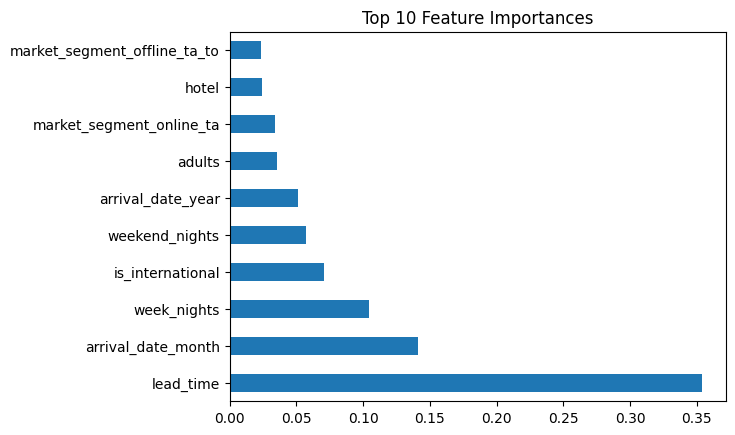

In [ ]:
# # Train Random Forest
# rf = RandomForestClassifier(random_state=42, n_jobs=-1)
# rf.fit(X_train, y_train)

# # Predictions
# y_pred = rf.predict(X_test)
# y_proba = rf.predict_proba(X_test)[:, 1]

# # Evaluation
# print(classification_report(y_test, y_pred))
# print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# # Feature importance
# feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
# feature_importances.head(10).plot(kind='barh', title='Top 10 Feature Importances')
# plt.show()

# Evaluate model

Threshold | Precision | Recall | F1-score
----------------------------------------
0.1      | 0.57     | 0.99   | 0.72
0.2      | 0.60     | 0.95   | 0.74
0.3      | 0.63     | 0.90   | 0.74
0.4      | 0.66     | 0.81   | 0.73
0.5      | 0.68     | 0.72   | 0.70
0.6      | 0.69     | 0.59   | 0.64
0.7      | 0.72     | 0.45   | 0.55
0.8      | 0.76     | 0.30   | 0.43
0.9      | 0.81     | 0.14   | 0.23


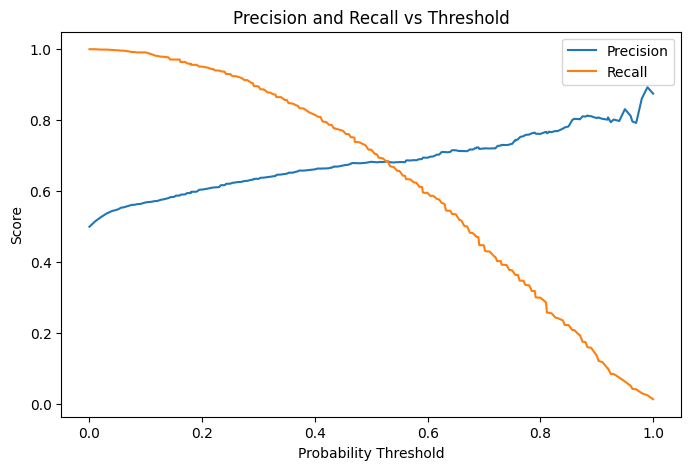

In [12]:

# Predicted probabilities for the positive class (cancellations)
y_proba = rf.predict_proba(X_test)[:, 1]

# Thresholds to evaluate
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

print("Threshold | Precision | Recall | F1-score")
print("----------------------------------------")
for t in thresholds:
    y_pred_t = (y_proba >= t)
    precision = precision_score(y_test, y_pred_t)
    recall = recall_score(y_test, y_pred_t)
    f1 = f1_score(y_test, y_pred_t)
    print(f"{t:.1f}      | {precision:.2f}     | {recall:.2f}   | {f1:.2f}")

# Optional: plot Precision-Recall vs Threshold
precision_vals, recall_vals, thresh_vals = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8,5))
plt.plot(thresh_vals, precision_vals[:-1], label='Precision')
plt.plot(thresh_vals, recall_vals[:-1], label='Recall')
plt.xlabel('Probability Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.show()

The goal is to catch as many cancelations as possible (high recall), but also I want to avoid too many false positives. 
That means I need a balanced threshold -low enough to catch most cancellations but not so low to get too many false positives.

Classification report at threshold 0.3:
              precision    recall  f1-score   support

       False       0.82      0.48      0.61      1000
        True       0.63      0.90      0.74      1000

    accuracy                           0.69      2000
   macro avg       0.73      0.69      0.68      2000
weighted avg       0.73      0.69      0.68      2000

ROC-AUC: 0.760532


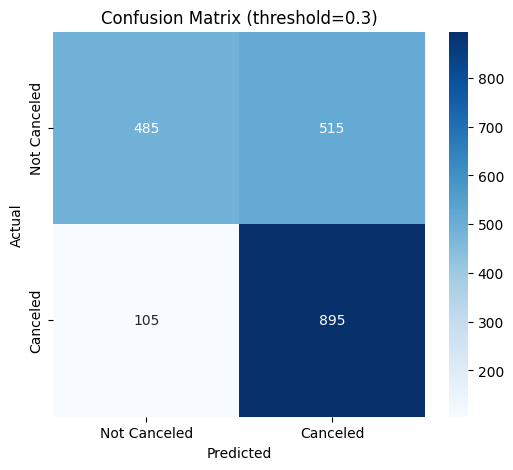

In [13]:
# Apply threshold
threshold = 0.3
y_pred_final = (y_proba >= threshold)

# Classification report
print(f"Classification report at threshold {threshold}:")
print(classification_report(y_test, y_pred_final))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled','Canceled'], yticklabels=['Not Canceled','Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (threshold={threshold})')
plt.show()

Recall for canceled bookings (True): 0.90 → You’re catching 90% of actual cancellations, which is excellent for proactive actions.

Precision for canceled bookings: 0.63 → About 37% of bookings predicted as canceled are actually not canceled. So some false positives exist.

Recall for non-canceled bookings (False): 0.48 → Less than half of non-canceled bookings are correctly predicted, which is expected because we lowered the threshold to catch more cancellations.

Accuracy: 0.69 → Overall correct predictions are 69%. Accuracy is not the main focus here since the classes are balanced in this subset.

ROC-AUC: 0.76 → The model still has good discriminative ability.

Business Implication:

Using threshold 0.3 prioritizes catching cancellations, which is key for actions like sending reminders, offering incentives, or reallocating resources.

Some false positives are inevitable, but this is an acceptable trade-off when the goal is high recall.

In [14]:
# Predicted probabilities for the positive class
y_proba = rf.predict_proba(X_test)[:, 1]

# Set new threshold
threshold = 0.4
y_pred_threshold = (y_proba >= threshold)

# Evaluate metrics at threshold 0.4
print(f"Classification report at threshold {threshold}:")
print(classification_report(y_test, y_pred_threshold))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

Classification report at threshold 0.4:
              precision    recall  f1-score   support

       False       0.76      0.58      0.66      1000
        True       0.66      0.81      0.73      1000

    accuracy                           0.70      2000
   macro avg       0.71      0.70      0.69      2000
weighted avg       0.71      0.70      0.69      2000

ROC-AUC: 0.760532


I can conclude that: higher threshold leads to fewer false positives, but more missed cancellations. Lower threshold catches more cancellations, but more false alarms.
In the business requirement, cost of missing a cancellation is high (lost revenue, last-minute vacancies) and sending offers/incentives to prevent cancellations is cheap and automated.
The business goal is to proactively reach out (via offers or incentives) to customers likely to cancel, and for that reason I will consider a lower threshold as 0,3 valid
This approach maximizes the number of potential cancellations cought, even if it means some customers who wouldn’t have canceled receive offers. If the cost of sending offers is low compared to the potential benefit of saving bookings, this is a sound strategy. A further/future analysis would develop this idea and will analyse potential costs of cancelations, offers, automated systems etc.

In [15]:
rf_weighted = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    n_estimators=500,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=20
)
rf_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=42)

# Check feature importance

                         feature  importance
1                      lead_time    0.253482
9               is_international    0.147997
3             arrival_date_month    0.084215
18      market_segment_online_ta    0.076519
5                    week_nights    0.069013
2              arrival_date_year    0.066144
17  market_segment_offline_ta_to    0.043918
4                 weekend_nights    0.039657
6                         adults    0.026307
0                          hotel    0.025388


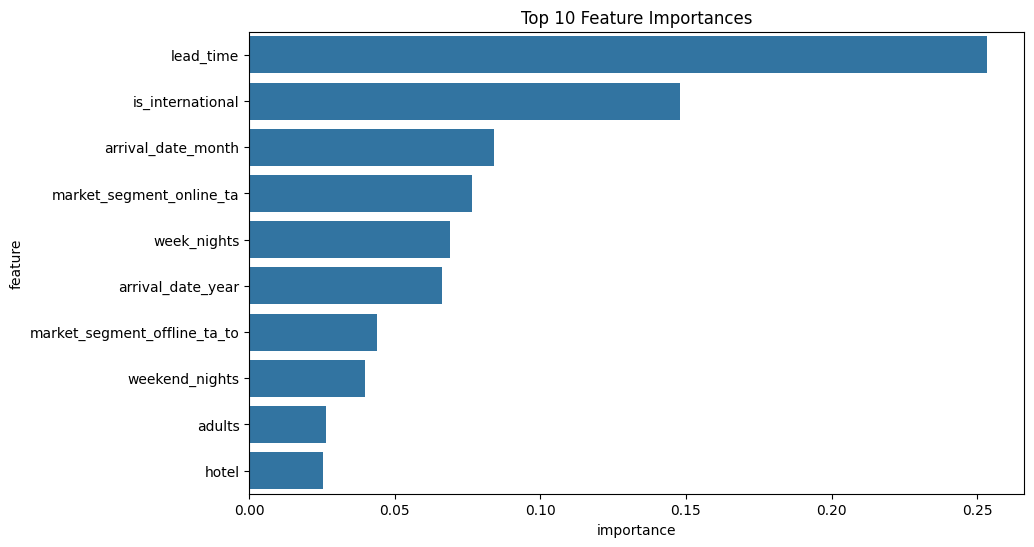

In [16]:
# Create a DataFrame of feature importances
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_weighted.feature_importances_
})

# Sort by importance descending
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Display top 10 features
print(feature_importances.head(10))

# Plot top 10 features
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

- lead_time (0.25)	Most predictive feature. Bookings made far in advance are much more likely to cancel — customers have more time to change plans	
- is_international (0.15)	International guests have higher cancellation risk (travel restrictions, visa issues, flight costs)	
- arrival_date_month (0.08)	Seasonality plays a role — some months (summer, holidays) may have higher cancellation or rescheduling rates	
- market_segment_online_ta (0.08)	Bookings through online travel agencies (OTAs) tend to have more flexible cancellation policies — higher risk	
- week_nights (0.07)	Longer weekday stays might correlate with business travel, which can fluctuate or get canceled	
- arrival_date_year (0.07)	Some years might reflect macro patterns (like travel restrictions or demand recovery)	
- market_segment_offline_ta_to (0.04)	Offline travel agent or tour operator bookings tend to be more stable — lower risk	
- weekend_nights (0.04)	Shorter weekend stays often have less cancellation risk	
- adults (0.03)	Family/group bookings are usually more stable than solo travelers	
- hotel (0.03)	The type of hotel (city vs resort) still influences cancellation likelihood — resorts often see higher rates due to vacation planning uncertainty

# Cross validation

In [17]:
# Evaluate the model using 5-fold cross-validation on the training data
cv_scores = cross_val_score(
    rf_weighted, X_train, y_train,
    cv=5, scoring='roc_auc', n_jobs=-1
)

print("Cross-validation ROC-AUC scores:", cv_scores)
print("Mean ROC-AUC:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation ROC-AUC scores: [0.80691172 0.79811094 0.78277188 0.76884375 0.77811875]
Mean ROC-AUC: 0.78695140625
Standard deviation: 0.013757330595620178


The model’s cross-validated ROC-AUC averages 0.79 with a low standard deviation, demonstrating both strong discriminatory power and stability across different data subsets. This suggests the model is reliable for predicting booking cancellations and is unlikely to be overfitting to any particular fold of the data.

# Save the model

In [18]:
# Define the path to save the model
model_path = os.path.join(current_dir, "model", "cancelscope_model.pkl")

# Save the trained model (rf_weighted) to the specified file
joblib.dump(rf_weighted, model_path)
print(f"Model saved to {model_path}")

Model saved to d:\vscode-projects\CancelScope-Hotel-Booking-Analysis\model\cancelscope_model.pkl


---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [19]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)